# US Airlines Sentiment Analysis
## by : Febi Andika Dani Fajar Suryawan

## Study Case


I want to do a study of the performance of US airlines based on tweets written by Twitter users about US airlines.  Given the data US Twitter Airline Sentiment which contains record of tweets by Twitter users about US airline for the past week.

## Import Module

In [2]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\febian064178\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Preparation

### 1. Import Dataset

In [5]:
df=pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


From the above data, we get that there is an airline_sentiment column which is a sentiment label of the Twitter text written by the user. So we don't need to do the labeling process anymore.

### 2. Preview Dataset

In [7]:
# Descriptive statistics
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.448500e+04,14485.000000,10416.000000,14485.000000
mean,5.692072e+17,0.899958,0.637874,0.083397
std,7.756739e+14,0.162961,0.330636,0.749632
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685515e+17,0.692300,0.360375,0.000000
50%,5.694398e+17,1.000000,0.670600,0.000000
75%,5.698811e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
# Preview shape dataset
df.shape

(14485, 15)

In [9]:
# Preview info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [10]:
# Checking missing values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64

In [71]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df["date_created"] = df["tweet_created"].dt.date

## Data  Preprocessing

This step is used to cleansing the text column in the data.

In [146]:
df3=df

### 1. Lower casing

In [129]:
df3['text'] = df3['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['text'].head()

0    @jetblue's new ceo seeks the right balance to ...
1    @jetblue is really getting on my nerves !! 😡😡 ...
2    @united yes. we waited in line for almost an h...
3    @united the we got into the gate at iah on tim...
4    @southwestair its cool that my bags take a bit...
Name: text, dtype: object

### 2. Punctuation removal

In [131]:
df3['text'] = df3['text'].str.replace('[^\w\s]','')
df3.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date_created
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,jetblues new ceo seeks the right balance to pl...,NaN,2015-02-17 07:36:05,USA,Sydney,2015-02-17
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,jetblue is really getting on my nerves nothappy,NaN,2015-02-17 07:43:02,undecided,Pacific Time (US & Canada),2015-02-17
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,united yes we waited in line for almost an hou...,NaN,2015-02-17 07:48:48,"Washington, DC",NaN,2015-02-17
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,united the we got into the gate at iah on time...,NaN,2015-02-17 07:52:20,NaN,Buenos Aires,2015-02-17
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,southwestair its cool that my bags take a bit ...,NaN,2015-02-17 08:00:36,"Los Angeles, CA",Pacific Time (US & Canada),2015-02-17


### 3. Stopwords removal

In [133]:
stop = stopwords.words('english')
df3['text'] = df3['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df3['text'].head(10)

0    jetblues new ceo seeks right balance please pa...
1               jetblue really getting nerves nothappy
2    united yes waited line almost hour passengers ...
3    united got gate iah time given seats closed fl...
4    southwestair cool bags take bit longer dont gi...
5    united dont hope nicer flight time try things ...
6    united like delays less im one plane connect v...
7    united link current status flightsairports fly...
8    southwestair guys hour 2 phone hold 3am bc vol...
9                 united tried 2 dm would go thru sure
Name: text, dtype: object

### 4. Spelling correction

In [135]:
df3['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    jetblues new co seeks right balance please pas...
1               jetblue really getting nerves nothappy
2    united yes waited line almost hour passengers ...
3    united got gate ah time given seats closed fli...
4    southwestair cool bags take bit longer dont gi...
Name: text, dtype: object

### 5. Tokenization

In [136]:
TextBlob(df3['text'][1]).words

WordList(['jetblue', 'really', 'getting', 'nerves', 'nothappy'])

### 6. Stemming

In [137]:
st = PorterStemmer()
df3['text'] = df3['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### 7. Lematization

In [138]:
from textblob import Word
df3['text'] = df3['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df3['text'].head()

0    jetblu new ceo seek right balanc plea passeng ...
1                      jetblu realli get nerv nothappi
2    unit ye wait line almost hour passeng left wan...
3    unit got gate iah time given seat close flight...
4    southwestair cool bag take bit longer dont giv...
Name: text, dtype: object

## Exploration Data Analysis

### 1. Data Exploration

First we want to find out how many tweets each airline has received.

Text(0,0.5,'No. of Tweets')

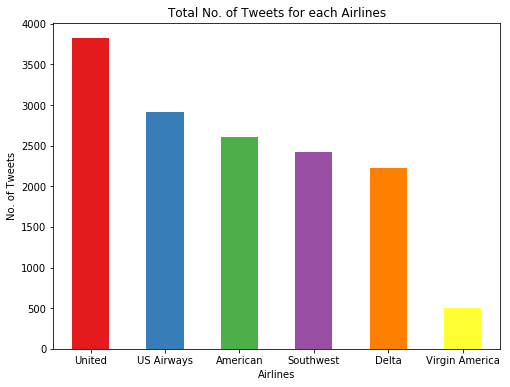

In [16]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("Set1", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

We get that United Airlines is the airline that gets the most tweets from users.
<br>
<br>
After that, we will find out how many tweets are based on each type of sentiments.

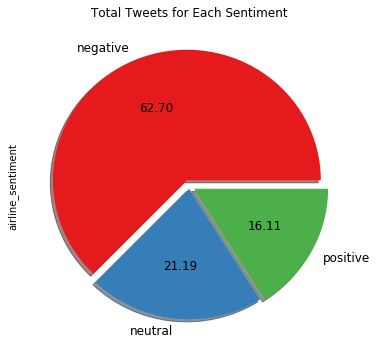

In [163]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("Set1", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")


We find that most of the users write tweets with negative sentiment. Wow, this is a problem for airline services!
<br>
<br>
Let's check the number of tweets for each type of sentiments based on each airlines.

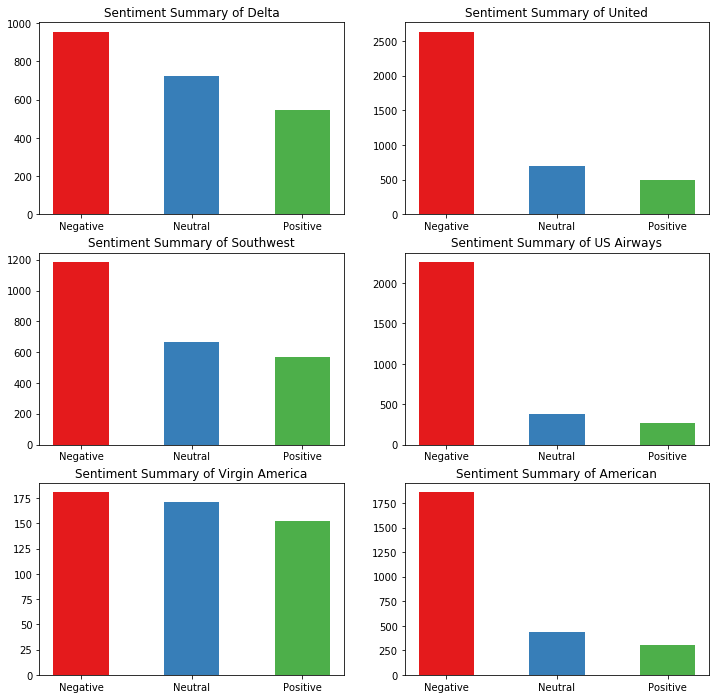

In [148]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("Set1", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

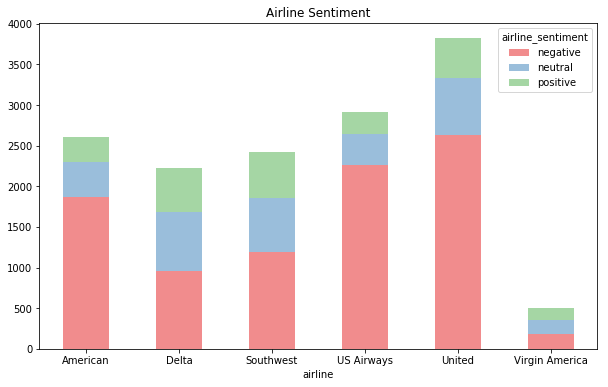

In [162]:
color=sns.color_palette("Set1", 10)
air_sentiment=pd.crosstab(df.airline, df.airline_sentiment)
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment",color=color)

In [156]:
percent=air_sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.582181,16.628264,11.789555
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


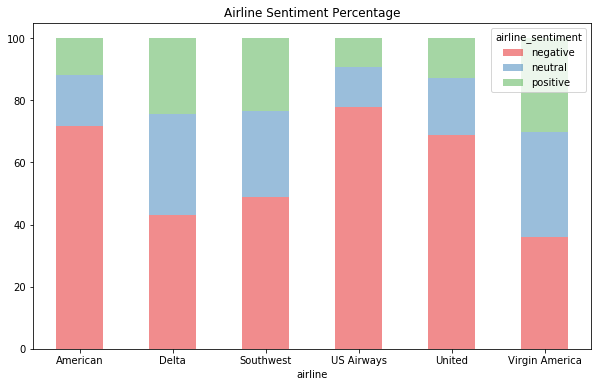

In [161]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment Percentage",color=color)

We get that United Airline has the most negative sentiment from Twitter users compared to other airlines. A warning for United Airline Management!

We want to know the number of tweets for each type of sentiments based on the date of the tweet.

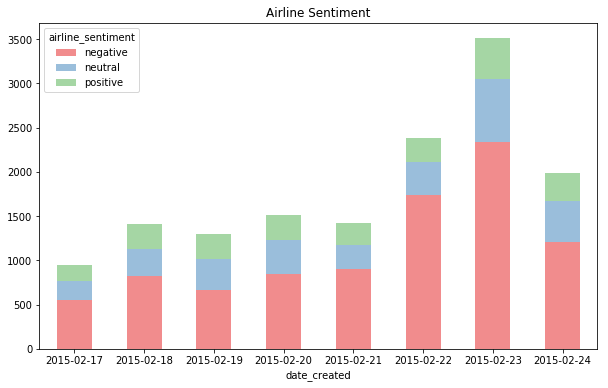

In [150]:
pd.crosstab(index = df["date_created"],columns = df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment",color=color)

We get that the most Twitter users write tweets about US airlines is on February 23, 2015.
<br>
<br>
And for each type of sentiments, the percentage of tweets based on the tweet date is as follows.

In [153]:
df2=pd.crosstab(df.date_created, df.airline_sentiment)
percent1=df2.apply(lambda a: a / a.sum() * 100, axis=1)
percent1

airline_sentiment,negative,neutral,positive
date_created,,,
2015-02-17,57.922350,23.084995,18.992655
2015-02-18,58.403955,21.468927,20.127119
2015-02-19,51.309707,26.656394,22.033898
2015-02-20,56.150794,25.330688,18.518519
2015-02-21,63.540197,19.181946,17.277856
2015-02-22,72.906198,15.368509,11.725293
2015-02-23,66.704643,20.250641,13.044717
2015-02-24,60.532931,23.428859,16.038210


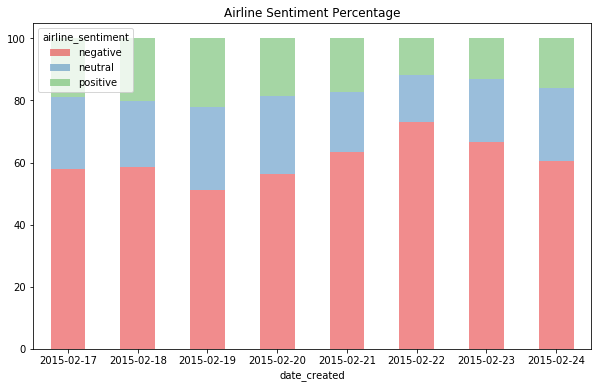

In [164]:
percent1.plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment Percentage",color=color)

For each type of sentiments, the number of tweets received by each airline based on the tweet date is as follows.

In [111]:
df1 = df.groupby(['date_created','airline'])
df1 = df1.airline_sentiment.value_counts()
df1.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-17   Delta               51.0     63.0      47.0
             Southwest          162.0     69.0      56.0
             US Airways         156.0     22.0      33.0
             United             173.0     50.0      29.0
             Virgin America      10.0     16.0      16.0
2015-02-18   Delta              127.0     84.0      78.0
             Southwest          143.0     96.0      90.0
             US Airways         259.0     29.0      44.0
             United             281.0     74.0      53.0
             Virgin America      17.0     21.0      20.0
2015-02-19   American             1.0      NaN       1.0
             Delta              127.0     68.0      74.0
             Southwest          103.0    102.0      86.0
             US Airways         189.0     58.0      34.0
             United             224.0     97.0      71.0
             Virgin America      22.0     21.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta              108.0     97.0      78.0
             Southwest          139.0     98.0      73.0
             US Airways         234.0     50.0      34.0
             United             347.0    104.0      78.0
             Virgin America      20.0     34.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               91.0     78.0      55.0
             Southwest          219.0     77.0      64.0
             US Airways         224.0     31.0      26.0
             United             333.0     72.0      72.0
             Virgin America      33.0     14.0      28.0
2015-02-22   American           313.0     46.0      41.0
             Delta              221.0     82.0      83.0
             Southwest          143.0     52.0      53.0
             US Airways         536.0     58.0      28.0
             United             494.0    109.0      63.0
             Virgin America      34.0     20.0      12.0
2015-02-23   American          1067.0    214.0     144.0
             Delta              160.0    181.0      83.0
             Southwest          151.0    107.0      94.0
             US Airways         431.0     76.0      46.0
             United             503.0    103.0      71.0
             Virgin America      30.0     30.0      20.0
2015-02-24   American           481.0    173.0     121.0
             Delta               70.0     70.0      46.0
             Southwest          126.0     63.0      54.0
             US Airways         234.0     57.0      24.0
             United             278.0     88.0      55.0
             Virgin America      15.0     15.0      19.0

Next, we will check the reasons why Twitter users have written tweets with negative sentiment for the airline.

Text(0,0.5,'No. of Tweets')

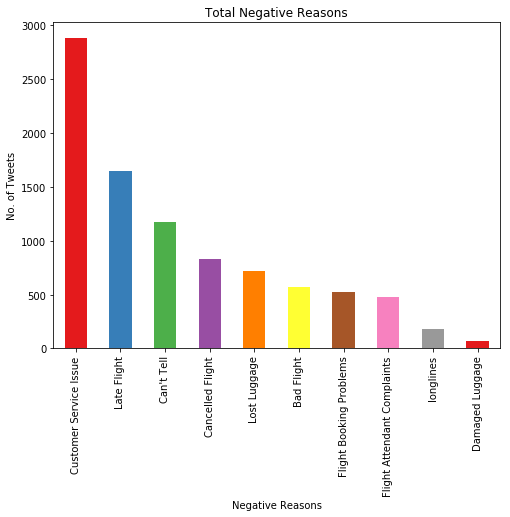

In [22]:
#Plotting all the negative reasons 
color=sns.color_palette("Set1", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

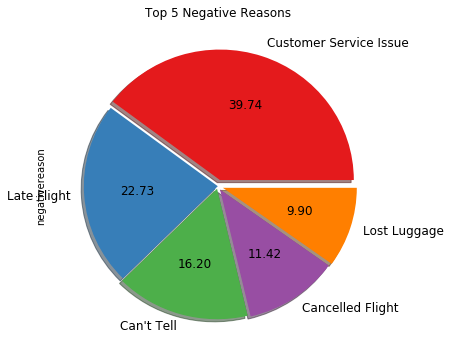

In [28]:
color=sns.color_palette("Set1", 10)
pd.Series(df["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

The 5 highest reasons for Twitter users writing negative tweets about US airlines are customer service issues, late flight, canceled flight, lost luggage and 16.20% of users can't tell the reason.

### 2. Word Clouds

Word Clouds (also known as wordle, word collage or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently. 
We will create a word cloud for each type of sentiment based on tweets written by Twitter users.

In [139]:
#define positive, neutral and negative 
positive = df3.loc[df3['airline_sentiment'] == "positive"]
neutral = df3.loc[df3['airline_sentiment'] == "neutral"]
negative = df3.loc[df3['airline_sentiment'] == "negative"]

In [140]:
#merge all the happy comments into one paragraph
all_description_positive = "".join(positive.text.values)
all_description_neutral = "".join(neutral.text.values)
all_description_negative = "".join(negative.text.values)

In [141]:
#make a wordcloud 
def create_word_cloud(string):
    plt.figure(1,figsize=(12, 12))
    cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

**Positive Sentiment Word Cloud**

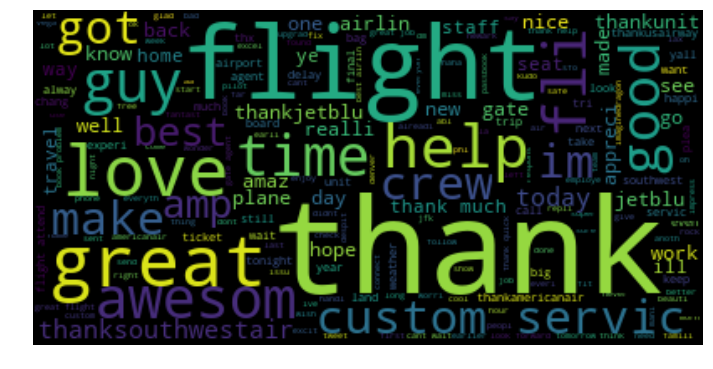

In [142]:
# Positive wordcloud
create_word_cloud(all_description_positive)

**Negative Sentiment Word Cloud**

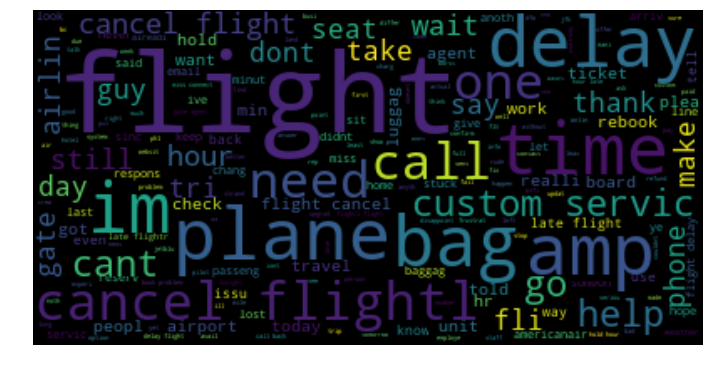

In [143]:
# negative wordcloud
create_word_cloud(all_description_negative)

**Neutral Sentiment Word Cloud**

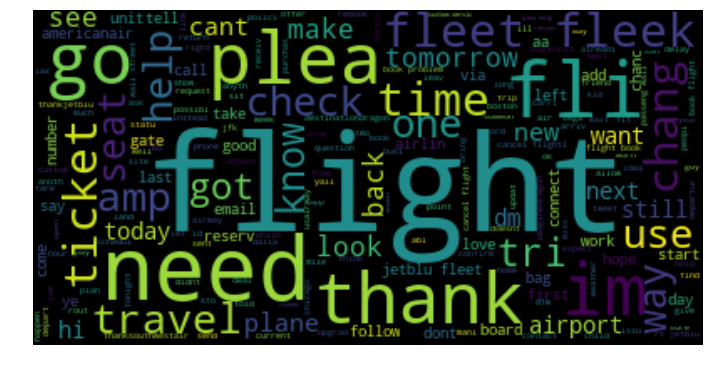

In [144]:
# neutral wordcloud
create_word_cloud(all_description_neutral)

## Conclusion

From the data above we get that :
1. In overall, most of the Twitter users write tweets with negative sentiment about US Airlines.
2. The most Twitter users write tweets about US airlines is on February 23, 2015. 
3. The highest reasons for Twitter users writing negative tweets about US airlines is customer service issues.

From the exploration of the data above, US airlines management can improve its performance in several parts, particularly in the customer service section so that US airlines users are satisfied using US airlines services.